In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

print(data.head())
print(data.columns)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
Index(['#Passengers'], dtype='object')


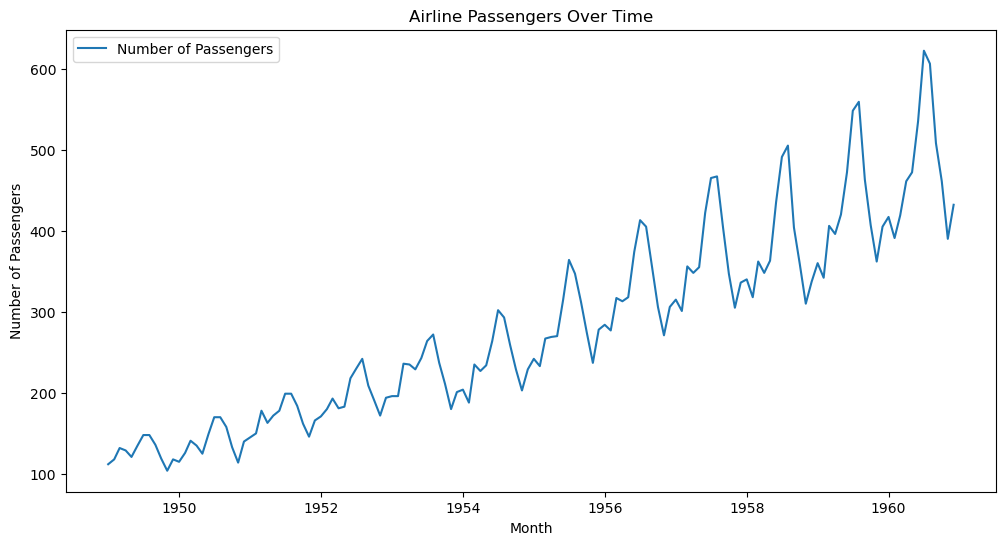

In [5]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['#Passengers'], label='Number of Passengers')
plt.title('Airline Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [6]:
# Create a new dataframe with time as a feature
data['Month_Ordinal'] = np.arange(len(data))  # Create a time index as ordinal
X = data[['Month_Ordinal']]  # Feature
y = data['#Passengers']  # Target variable

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 32.32237953507595
Root Mean Squared Error: 39.59463334377551


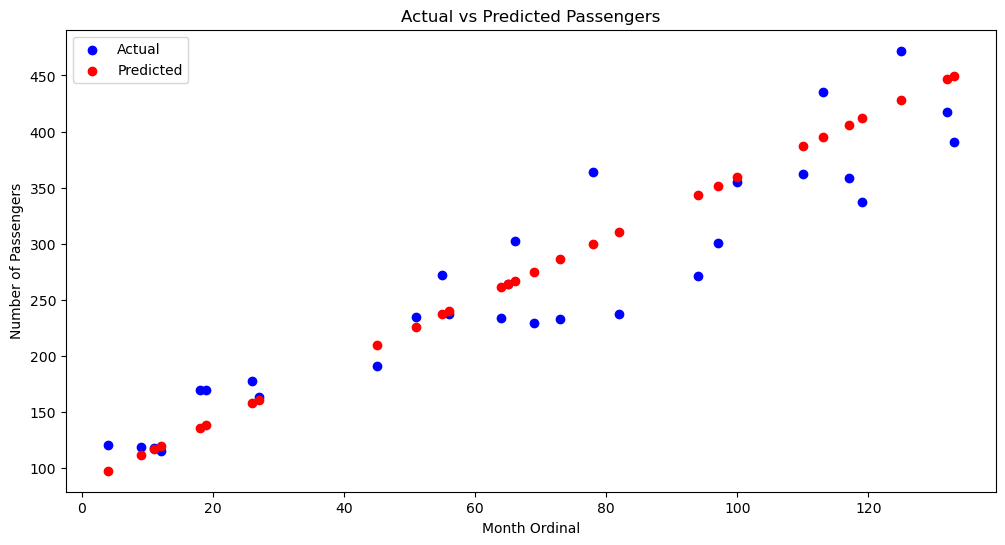

In [9]:
# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Passengers')
plt.xlabel('Month Ordinal')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [11]:
# Future predictions
future_months = np.arange(len(data), len(data) + 12).reshape(-1, 1)  # Next 12 months
future_months_df = pd.DataFrame(future_months, columns=['Month_Ordinal'])  # Convert to DataFrame

future_predictions = model.predict(future_months_df)  # Use the DataFrame for predictions


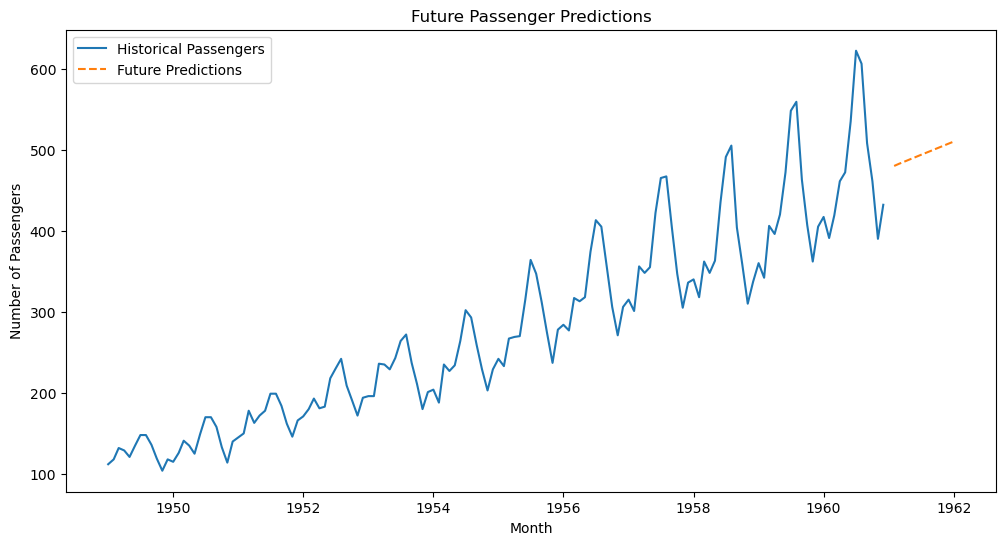

In [13]:
# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['#Passengers'], label='Historical Passengers')
future_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
plt.plot(future_index, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Future Passenger Predictions')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()